In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
trade = pd.read_csv("cashewprep.csv")#Initial Data
exports = trade.loc[trade['Flow'] == 'Export'] #Separate Exports
exports = exports.loc[exports['Country or Area'] != 'India']#Exclude India
exports = exports.loc[exports['Country or Area'] != 'Viet Nam']#Exclude Viet Nam
exports = exports.loc[exports['Country or Area'] != 'Brazil']#Exclude Brazil
exports['pct'] = exports[]
imports = trade.loc[trade['Flow'] == 'Import'] #Separate Imports
by_year = exports.groupby(exports['Year'])['Quantity'].sum()#Group by year and sum exports

Text(0.5,1,'World Cashew Exports, 1997-2016')

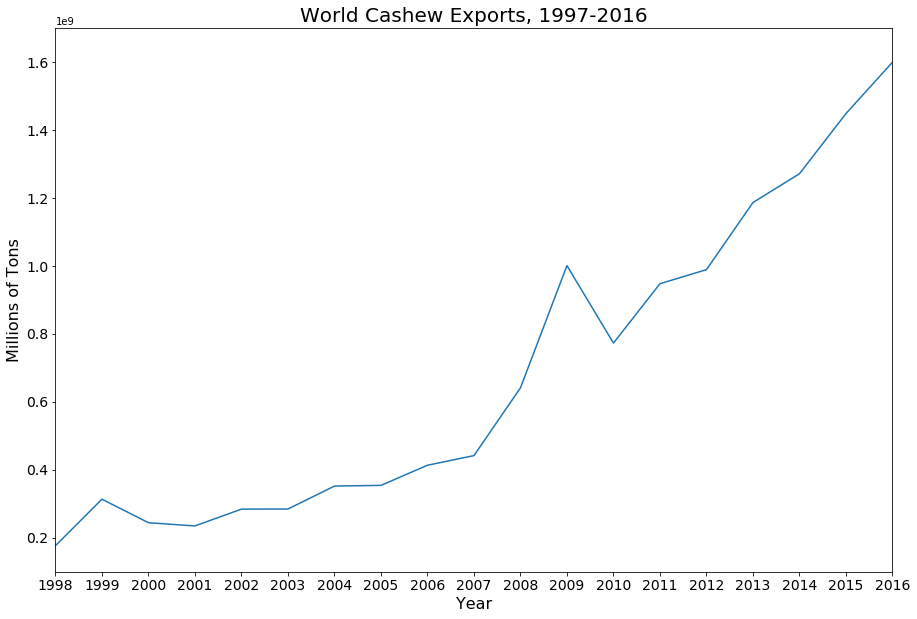

In [36]:
plt.figure(figsize=(15,10))
plt.plot(by_year)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(200000000, 1700000000, 200000000), fontsize=14)
plt.ylabel('Millions of Tons', fontsize=16)
plt.ylim(100000000,1700000000)
plt.xlim(1998,2016)
plt.title('World Cashew Exports, 1997-2016', fontsize=20)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


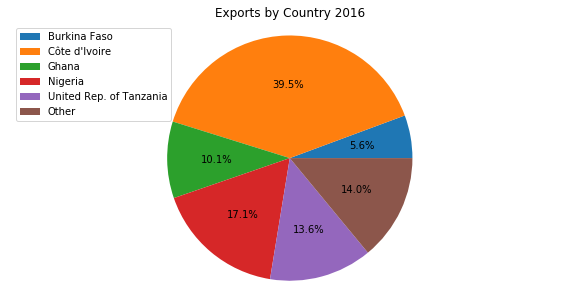

Looks like Cote DIvoire is the top exporter for 2016
Has is it always been that way?


In [69]:
#See who the major players are
recent = exports.loc[exports['Year'] == 2016]#Snapshot 2016
recenti = imports.loc[imports['Year'] == 2016]
#Generate a DataFrame for a pie chart
pie1 = pd.DataFrame()
pie1['labels'] = recent['Country or Area']
pie1['quantity'] = recent['Quantity']
pie1['pctofw'] = recent['Quantity']/sum(recent['Quantity'])
#print(pie1) # Too many entries for a clean pie chart
#Separate those who export at least 5% of world exports
pie3 = pie1.loc[pie1['pctofw'] <= .05]
pie2 = pie1.loc[pie1['pctofw'] >= .05] #the others

#add a new entry for "Other" to the original DF.
pie2.loc['6'] = ['Other', sum(pie3['quantity']), sum(pie3['pctofw'])]

#Generate pie chart
labelex = pie2['labels']
plt.figure(figsize=(10, 5))
plt.pie(pie2.quantity, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Exports by Country 2016')
plt.legend(labelex)
plt.show()


print("Looks like Cote DIvoire is the top exporter for 2016")
print('Has is it always been that way?')


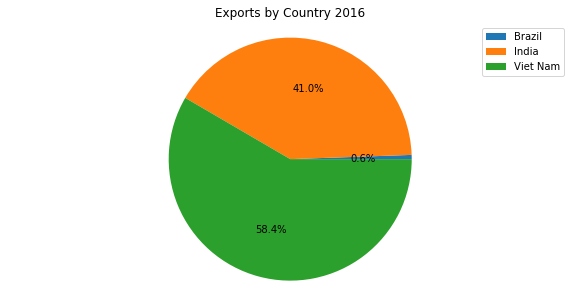

In [70]:
#For the Importers
labeli = recenti['Country or Area']
plt.figure(figsize=(10, 5))
plt.pie(recenti.Quantity, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Imports by Country 2016')
plt.legend(labeli)
plt.show()

Text(0.5,1,'Ivory Coast Exports, 1997-2016')

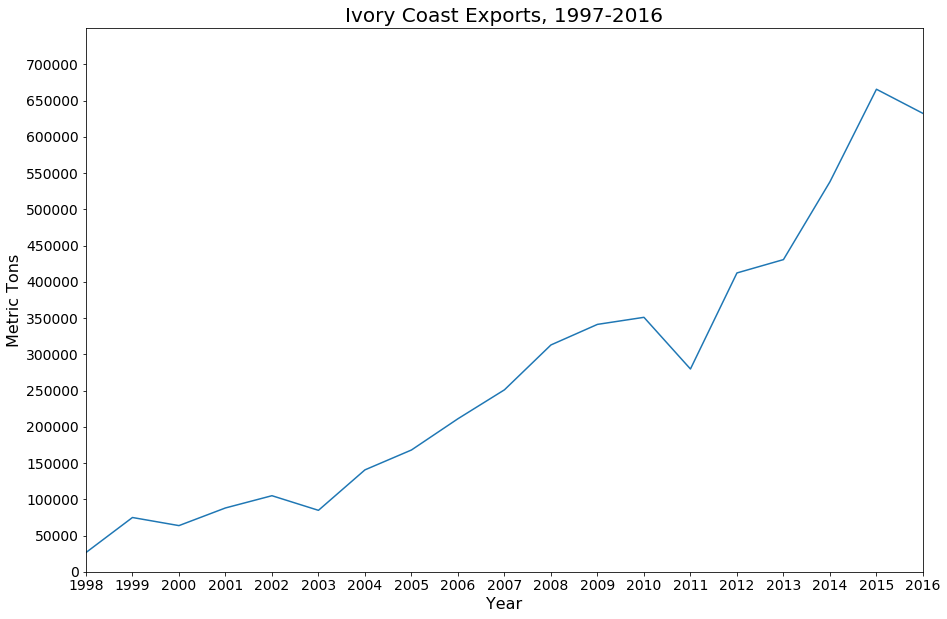

In [59]:
#Isolate Cote D'Ivoire's Chart
ivcexp = exports.loc[exports['Country or Area'] == "Côte d'Ivoire"]
plt.figure(figsize=(15,10))
plt.plot(ivcexp['Year'], ivcexp['Quantity']/1000)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(0, 750000, 50000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,750000)
plt.xlim(1998,2016)
plt.title("Cote D'Ivoire's Exports, 1997-2016", fontsize=20)

In [90]:
#Generate data fot a stacked bar graph for 10 years of history
recent = exports.loc[exports['Year'] == 2016]
stack16 = pie2

y2015 = exports.loc[exports['Year'] == 2015]
y2015['pct'] = y2015["Quantity"]/sum(y2015['Quantity'])
y2015p = y2015.loc[y2015['pct'] >= .05]
y2015o = y2015.loc[y2015['pct'] <= .05]
y2015p.loc['7'] = ['Other', 2015, 80130, 'Export', 100, sum(y2015o['Quantity']), sum(y2015o['pct'])]

y2014 = exports.loc[exports['Year'] == 2014]
y2013 = exports.loc[exports['Year'] == 2013]
y2012 = exports.loc[exports['Year'] == 2012]
y2011 = exports.loc[exports['Year'] == 2011]
y2010 = exports.loc[exports['Year'] == 2010]
y2009 = exports.loc[exports['Year'] == 2009]
y2008 = exports.loc[exports['Year'] == 2008]
y2007 = exports.loc[exports['Year'] == 2007]
y2006 = exports.loc[exports['Year'] == 2006]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [119]:
y2015p.index = y2015p['Country or Area']
y15 = y2015p.transpose()


                                 Country or Area  Year  Comm. Code    Flow  \
Country or Area                                                              
Benin                                      Benin  2015       80130  Export   
Burkina Faso                        Burkina Faso  2015       80130  Export   
Côte d'Ivoire                      Côte d'Ivoire  2015       80130  Export   
Ghana                                      Ghana  2015       80130  Export   
Indonesia                              Indonesia  2015       80130  Export   
Nigeria                                  Nigeria  2015       80130  Export   
United Rep. of Tanzania  United Rep. of Tanzania  2015       80130  Export   
Other                                      Other  2015       80130  Export   

                         Trade (USD)   Quantity       pct  
Country or Area                                            
Benin                       69545134  131241361  0.090595  
Burkina Faso                86044575  1

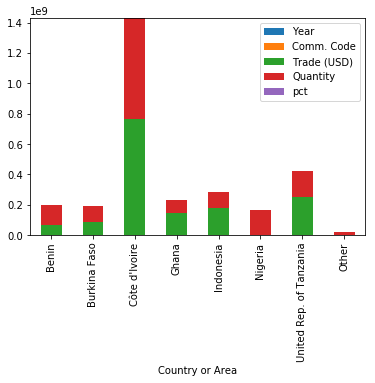

In [124]:
y2015p.plot.bar(y2015p['Country or Area'], stacked=True)
print(y2015p)
print(y15)